## Final project

Author: Hang, Mahmud and Ben

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt # if you want to do some plotting using matplotlib (optional)
import numpy as np # provide some mathematical functions
import xarray as xr # read, write, manipulate and analyze NetCDF files
from pathlib import Path # modify paths to files on the system
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
import warnings
warnings.filterwarnings('ignore')
import pysumma as ps

In [3]:
filemanager = '/home/jovyan/data/umpqua/settings/snow_fileManager_umpqua.txt'
executable = 'summa.exe'


## The original case

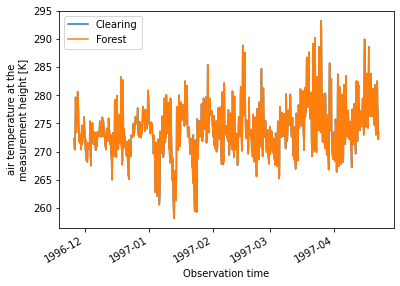

In [4]:
s = ps.Simulation(executable, filemanager)
s.run('local', run_suffix='baseline')

force_obs = s.force_file_list.open_forcing_data()[0]
force_obs['airtemp'].isel(hru=0).plot(label='Clearing')
force_obs['airtemp'].isel(hru=1).plot(label='Forest')
plt.legend()

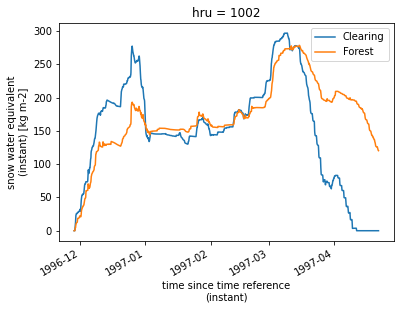

In [5]:
s.output['scalarSWE'].isel(hru=0).plot(label='Clearing')
s.output['scalarSWE'].isel(hru=1).plot(label='Forest')
plt.legend()

## Add a constant temperature

In [6]:
### Add a constant temperature 

T_add = 2 

In [7]:
s_temp = ps.Simulation(executable, filemanager)
force_file_obs = s_temp.force_file_list.options[0].name
force_obs = s_temp.force_file_list.open_forcing_data()[0]


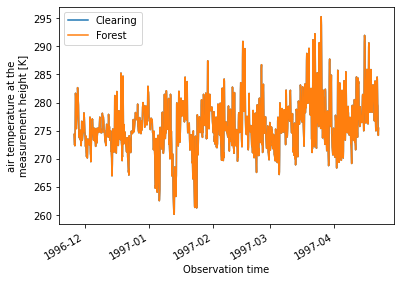

In [8]:
force_temp = force_obs.copy(deep=True)
force_temp['airtemp'].loc[{'hru': 1}] += T_add
force_temp['airtemp'].loc[{'hru': 0}] += T_add

force_temp['airtemp'].isel(hru=0).plot(label='Clearing')
force_temp['airtemp'].isel(hru=1).plot(label='Forest')
plt.legend()

In [12]:
force_file_temp = force_file_obs.replace('9697', '9697_rescaled_temp')
force_temp.to_netcdf(force_file_temp, format='NETCDF3_CLASSIC')
s_temp.force_file_list.options[0].name = force_file_temp
new_force_file = str(s_temp.force_file_list.file_name).replace('.txt', '_rescaled_temp.txt')
s_temp.force_file_list.file_name = Path(new_force_file)
s_temp.force_file_list.write()

manager = ps.FileManager(s_temp.manager.original_path, s_temp.manager.file_name)
manager['forcingListFile'] = new_force_file.split('/')[-1]
manager.file_name = Path(str(s_temp.manager.file_name).replace('.txt', '_rescaled_temp.txt'))
manager.write()
new_filemanager = manager.original_path / manager.file_name

In [15]:
s_temp = ps.Simulation(executable, new_filemanager)
print(s_temp.force_file_list)
s_temp.run('local', run_suffix='rescaled_temp')

'Storck_AboveCanopyPP_9697_rescaled_temp.nc'


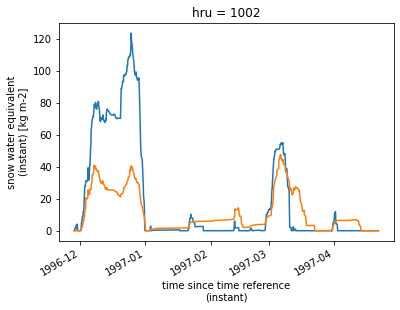

In [16]:
s_temp.output['scalarSWE'].isel(hru=0).plot(label='Clearing -- sim', 
                                             color=cycle[0], linestyle='-')
s_temp.output['scalarSWE'].isel(hru=1).plot(label='Forest -- sim',
                                             color=cycle[1], linestyle='-')